In [44]:
import pandas as pd #Veri analizi için kullandım.Tablo şeklinde verilerle kolayca çalışmayı sağlıyor
import numpy as np #Sayısal işlemler ve matematiksel hesaplamalar için kullandım.
import matplotlib.pyplot as plt #Veri görselleştirme için kullandım
import seaborn as sns #Veri görselleştirme için kullandım
from sklearn.preprocessing import LabelEncoder #kategorik verileri sayısal verilere dönüştürmek için kullandım..

data = pd.read_csv("turkey_car_market.csv") 
data.head() #ilk 5 satırı görüntüler

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [45]:
değişkenler = data.columns
değişkenler

Index(['İlan Tarihi', 'Marka', 'Arac Tip Grubu', 'Arac Tip', 'Model Yıl',
       'Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi',
       'Kimden', 'Durum', 'Km', 'Fiyat'],
      dtype='object')

In [46]:
data.isnull().sum()/len(data) #eksik değer oranını hesapladım.Amaç:Verinin güvenilirliği ve doğruluğu hakkında karar vermek


İlan Tarihi       0.0
Marka             0.0
Arac Tip Grubu    0.0
Arac Tip          0.0
Model Yıl         0.0
Yakıt Turu        0.0
Vites             0.0
CCM               0.0
Beygir Gucu       0.0
Renk              0.0
Kasa Tipi         0.0
Kimden            0.0
Durum             0.0
Km                0.0
Fiyat             0.0
dtype: float64

In [47]:
for i in değişkenler: #sutunda kaç adet bilmiyorum olduğunu yazdırdım

    print(i, len(data.loc[data[i] == "Bilmiyorum"]))  #loc veri seçme ve filtreleme yöntemidir

İlan Tarihi 0
Marka 0
Arac Tip Grubu 0
Arac Tip 0
Model Yıl 0
Yakıt Turu 0
Vites 0
CCM 108
Beygir Gucu 5549
Renk 0
Kasa Tipi 0
Kimden 0
Durum 0
Km 0
Fiyat 0


In [48]:
from sklearn.preprocessing import LabelEncoder #kategorik verileri sayısal verilere dönüştürmek için kullandım..


# 'Bilmiyorum' değerlerini temizleme
hp = data.loc[data["Beygir Gucu"] != "Bilmiyorum"].copy() #Beygir gücünde datanın yarısından fazla bilmiyorum değeri olduğu için temizledim

# Label Encoding işlemi
le = LabelEncoder() #LabelEncoder sınıfından bir nesne oluşturdum
cols = ['Marka', 'Arac Tip Grubu', 'Arac Tip', 'Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 
        'Renk', 'Kasa Tipi', 'Kimden', 'Durum']

for i in cols: 
    try:
        hp[i] = le.fit_transform(hp[i].astype(str))  # sayısal verilere dönüştürülür
    except Exception as e:
        print(f"Hata sütununda: {i}, hata: {e}")

# Sadece sayısal sütunları seçmek
hp_numeric = hp.select_dtypes(include=[np.number]) #Sadece sayısal sütunları seçmek için kullanılır. np.number sayısal türdeki verileri ifade eder.

# Korelasyon matrisi
corr = hp_numeric.corr() #Sayısal verilerin korelasyon matrisini hesaplar. Korelasyon, sütunlar arasındaki ilişkiyi ölçer.

# 'Beygir Gucu' sütunu ile korelasyonlar
if "Beygir Gucu" in corr.columns: #Korelasyon matrisinde "Beygir Gucu" sütununun olup olmadığı kontrol edilir.
    print(corr["Beygir Gucu"])
else:
    print("Beygir Gucu sütunu korelasyon matrisi içinde bulunamadı.")


Marka             0.111025
Arac Tip Grubu    0.013891
Arac Tip         -0.233308
Model Yıl        -0.197070
Yakıt Turu       -0.033927
Vites            -0.296195
CCM              -0.089664
Beygir Gucu       1.000000
Renk             -0.016172
Kasa Tipi         0.153541
Kimden            0.056280
Durum             0.076789
Km                0.032182
Fiyat            -0.137651
Name: Beygir Gucu, dtype: float64


In [49]:
q1 = data["Fiyat"].quantile(0.25)
q3 = data["Fiyat"].quantile(0.75)

IOC = q3 - q1

alt_sınır = q1 - 1.5*IOC
üst_sınır = q3 + 1.5*IOC

kontrol = (data["Fiyat"] < alt_sınır) | (data["Fiyat"] > üst_sınır)
data["Asırı_Deger"] = kontrol
data["Asırı_Deger"].value_counts()

Asırı_Deger
False    8285
True      759
Name: count, dtype: int64

In [50]:
data = data.loc[data["Asırı_Deger"] == False]

data.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500,False
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750,False
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000,False
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750,False
5,04/06/2020,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500,False


In [51]:
round(pd.pivot_table(data = data, columns = "Marka", values = "Fiyat")).T

,Fiyat
Marka,
Acura,118133.0
Alfa Romeo,96444.0
Audi,172321.0
BMW,172701.0
Chery,25500.0
Chevrolet,74823.0
Chrysler,94127.0
Citroen,79485.0
Dacia,81835.0


Örneğin Opel markası için model yıllarına göre fiyat değişimi


<Axes: xlabel='Model Yıl', ylabel='Fiyat'>

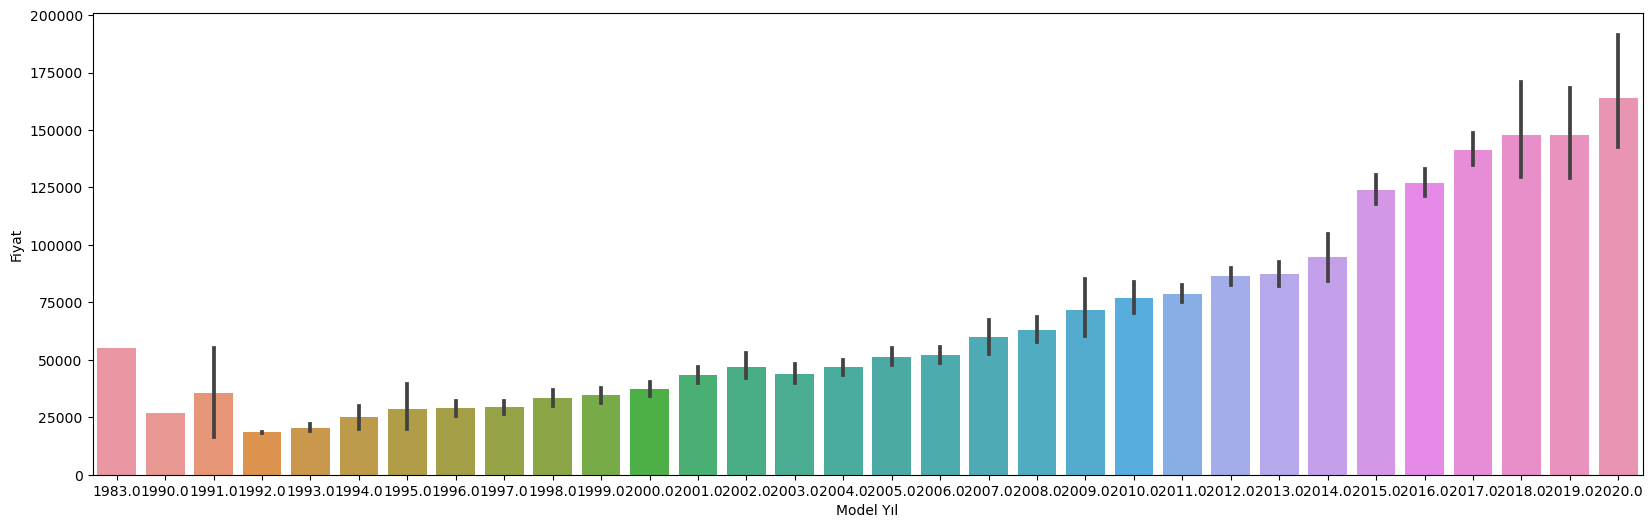

In [52]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x = data.loc[data["Marka"] == "Opel"]["Model Yıl"], y = data["Fiyat"])

Renault

<Axes: xlabel='Model Yıl', ylabel='Fiyat'>

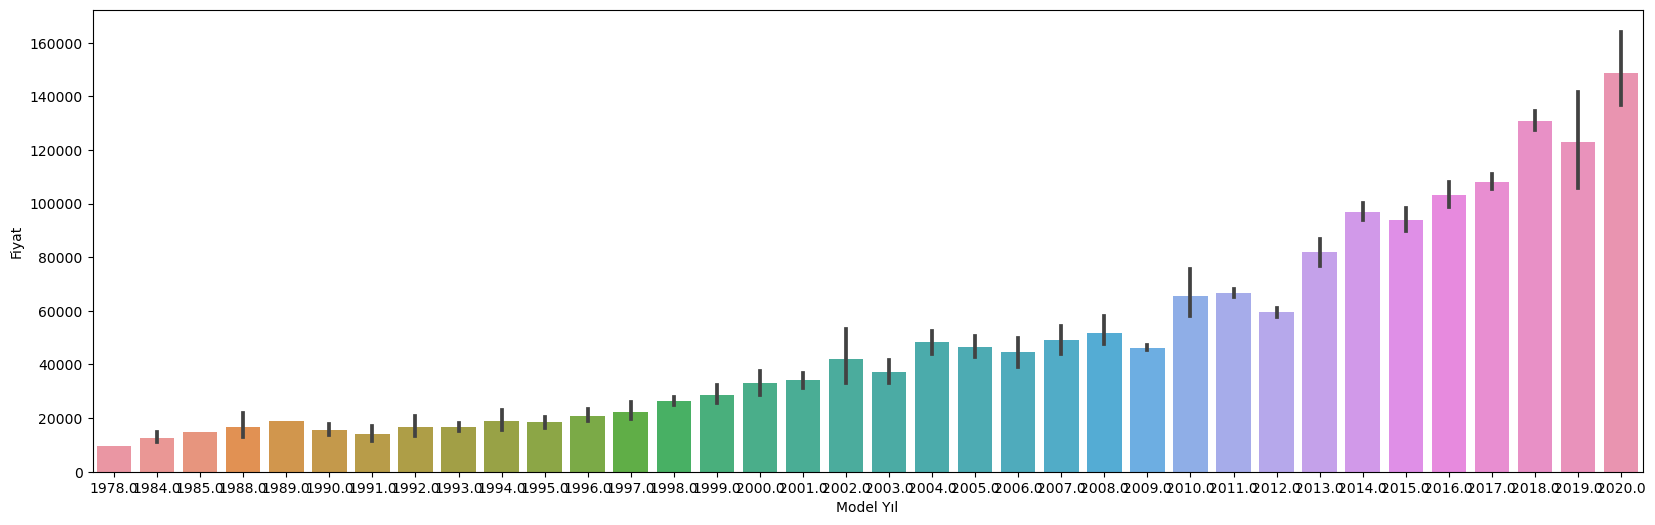

In [53]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x = data.loc[data["Marka"] == "Renault"]["Model Yıl"], y = data["Fiyat"])

Hyundai



<Axes: xlabel='Model Yıl', ylabel='Fiyat'>

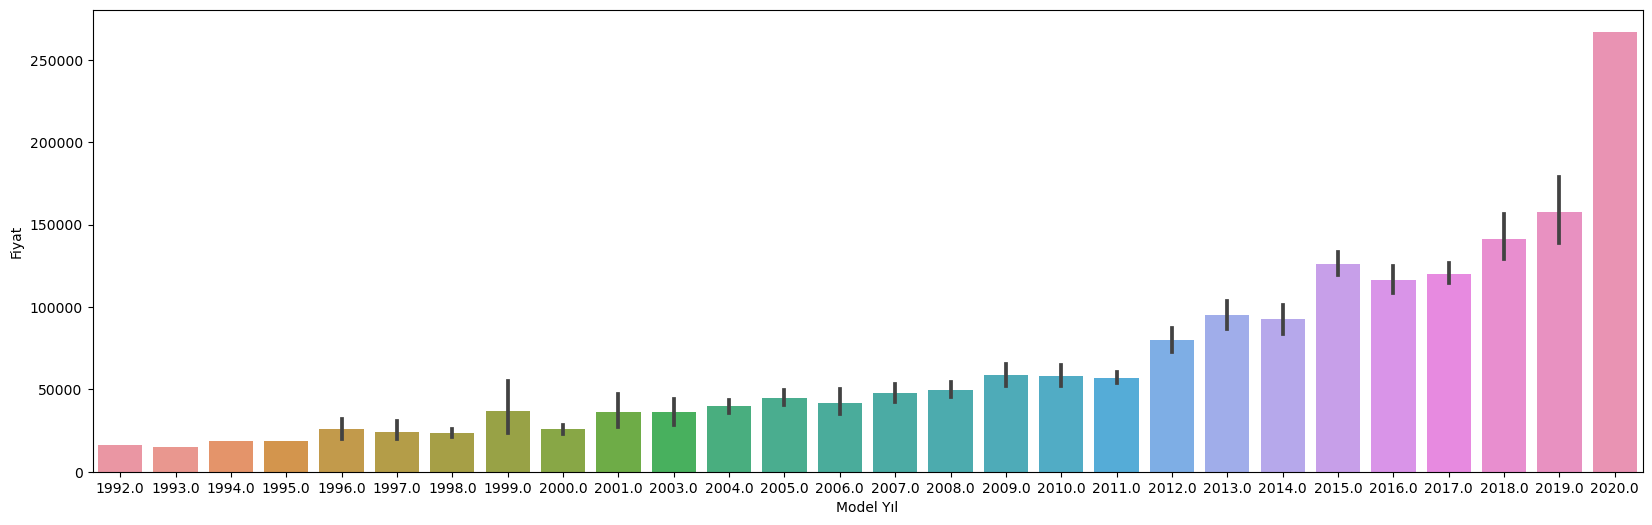

In [54]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x = data.loc[data["Marka"] == "Hyundai"]["Model Yıl"], y = data["Fiyat"])

Honda

<Axes: xlabel='Model Yıl', ylabel='Fiyat'>

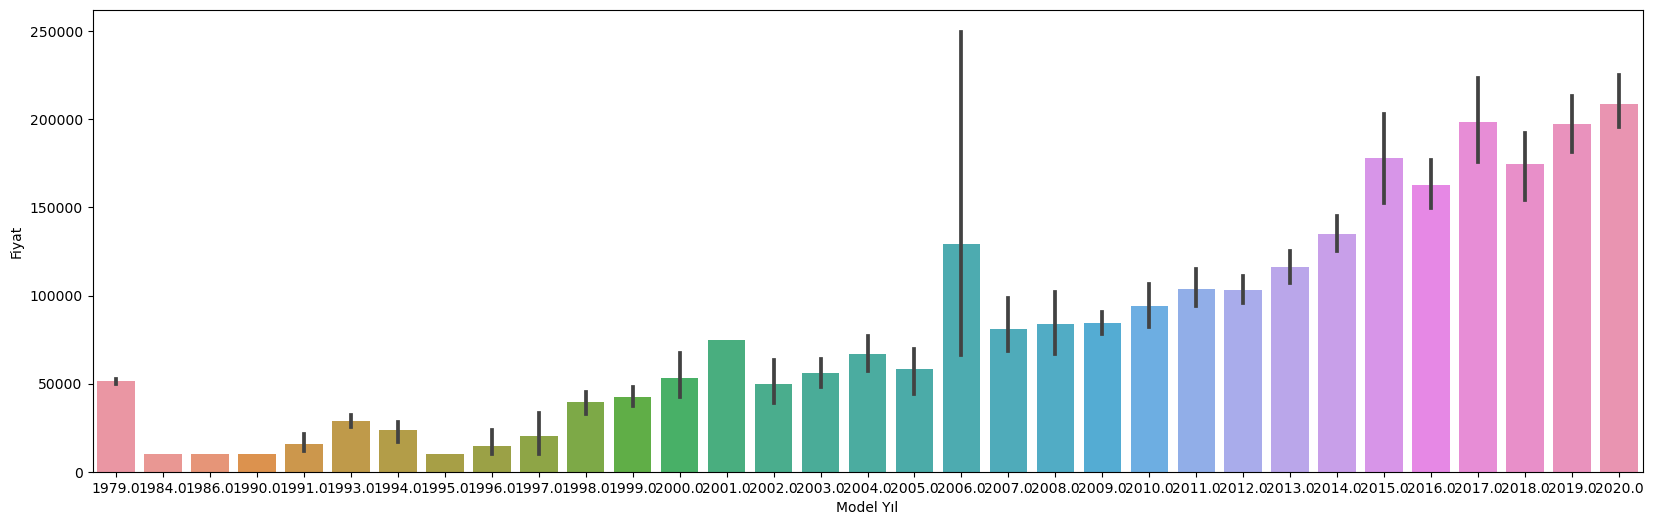

In [55]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x = data.loc[data["Marka"] == "Honda"]["Model Yıl"], y = data["Fiyat"])

<Axes: xlabel='Model Yıl', ylabel='Fiyat'>

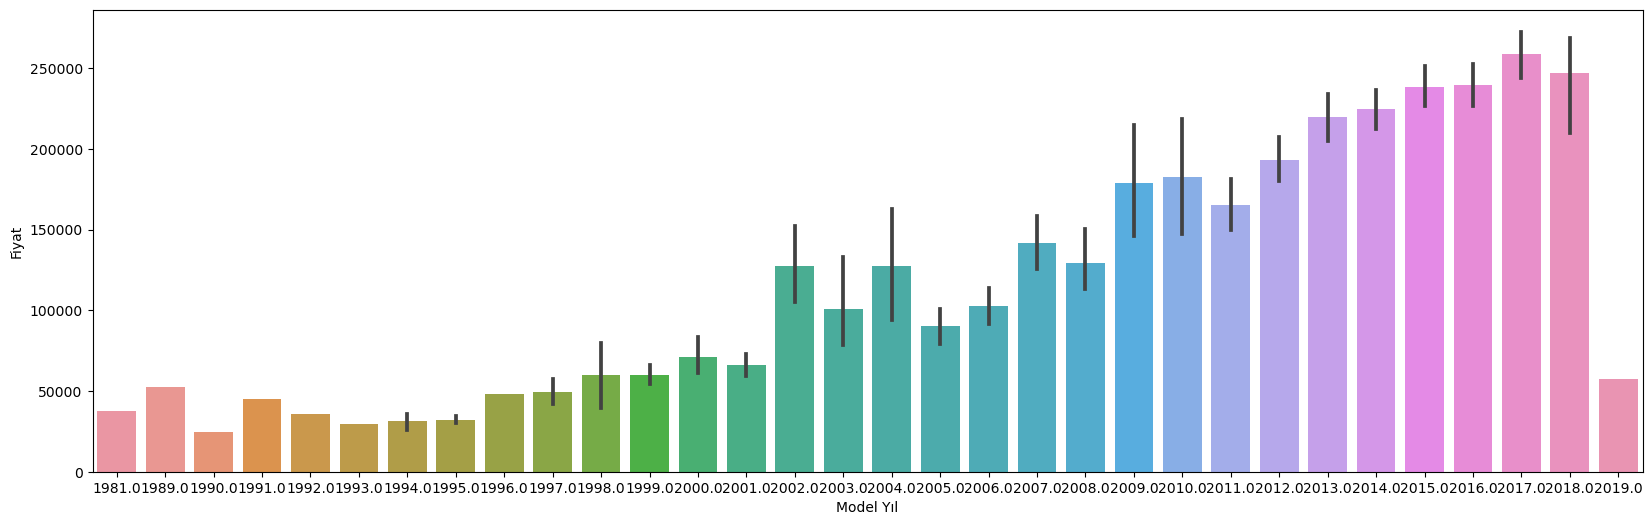

In [56]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x = data.loc[data["Marka"] == "BMW"]["Model Yıl"], y = data["Fiyat"])

Honda markasında 2006 yılına ait bir değer aşırı gözleme takılmamış fakat burada ortlamayı ciddi şekilde etkiliyor bu örneğe bakalım.

In [57]:
honda = data.loc[data["Marka"] == "Honda"]
honda_2006 = honda.loc[honda["Model Yıl"] == 2006]
honda_2006

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
3014,12/06/2020,Honda,CR-V,1.6 i-DTEC Elegance,2006.0,Dizel,Otomatik Vites,1601-1800 cc,151-175 BG,Beyaz,Arazi Aracı,Galeriden,2. El,98000,249700,False
3123,18/04/2020,Honda,Civic,1.6i VTEC Dream,2006.0,Benzin/LPG,Otomatik Vites,1301-1600 cc,Bilmiyorum,Gümüş Gri,Sedan,Galeriden,2. El,206000,72500,False
3196,17/04/2020,Honda,City,1.4 Elite,2006.0,Benzin,Yarı Otomatik Vites,1301-1600 cc,Bilmiyorum,Şampanya,Sedan,Galeriden,2. El,93000,66000,False


Şimdi 3014. satırdaki datanın fiyatı 249700 lira olarak girilmiş ki buda 2006 model bir araç için gayet yüksek bir fiyat. Peki yanlış olup olmadığını nasıl göreceğiz? Bunun için 2006 model arazi araçlarının ortalama fiyatlarına bakabiliriz veya 1601-1800 cc'lik araçlara eğer bu gruplara göre yine fiyat yüksek çıkarsa bu satırı silmeyi düşünebiliriz.

In [58]:
arazi = data.loc[data["Kasa Tipi"] == "Arazi Aracı"]
arazi_2006 = arazi.loc[arazi["Model Yıl"] == 2006]
arazi_2006

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
63,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
70,15/06/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,226-250 BG,Siyah,Arazi Aracı,Galeriden,2. El,230000,155000,False
142,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
354,17/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,Bilmiyorum,Siyah,Arazi Aracı,Galeriden,2. El,230000,148000,False
451,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
637,19/04/2020,BMW,X5,3.0d xDrive Exclusive,2006.0,Dizel,Otomatik Vites,2501-3000 cc,251-275 BG,Siyah,Arazi Aracı,Sahibinden,2. El,370000,125000,False
789,18/04/2020,BMW,X5,30d,2006.0,Dizel,Otomatik Vites,2501-3000 cc,Bilmiyorum,Siyah,Arazi Aracı,Galeriden,2. El,264000,122000,False
961,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
1001,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
1354,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False


In [59]:
ccm = data.loc[data["CCM"] == "1601-1800 cc"]
ccm_2006 = ccm.loc[ccm["Model Yıl"] == 2006]
ccm_2006

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
450,09/04/2020,Audi,A3,1.6 Ambiente,2006.0,Benzin/LPG,Otomatik Vites,1601-1800 cc,101-125 BG,Füme,Hatchback 5 Kapı,Sahibinden,2. El,115000,107000,False
1445,12/06/2020,Dacia,Logan,1.4 Ambiance,2006.0,Benzin/LPG,Düz Vites,1601-1800 cc,76-100 BG,Beyaz,Sedan,Galeriden,2. El,255000,29750,False
2348,15/06/2020,Ford,Fusion,1.6 Lux,2006.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Gri,Hatchback 5 Kapı,Galeriden,2. El,218000,52000,False
2386,10/06/2020,Ford,Fusion,1.6 TDCi Lux,2006.0,Dizel,Düz Vites,1601-1800 cc,100 BG ve altı,Gümüş,Hatchback 5 Kapı,Sahibinden,2. El,167,55000,False
2401,09/06/2020,Ford,Focus,1.6 TDCi Ghia,2006.0,Dizel,Otomatik Vites,1601-1800 cc,101-125 BG,Gri,Hatchback 5 Kapı,Galeriden,2. El,196000,63000,False
2464,30/05/2020,Ford,Focus,1.6 TDCi Trend,2006.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Beyaz,Sedan,Sahibinden,2. El,230000,60000,False
2465,30/05/2020,Ford,Focus,1.6 TDCi Trend,2006.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Gri,Sedan,Sahibinden,2. El,305000,49500,False
2489,26/05/2020,Ford,Focus,1.6 TDCi Collection,2006.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Siyah,Hatchback 5 Kapı,Galeriden,2. El,206000,61500,False
2945,24/03/2020,Ford,Focus,1.6 Ghia,2006.0,Dizel,Düz Vites,1601-1800 cc,Bilmiyorum,Gri,Sedan,Sahibinden,2. El,255,47500,False
3014,12/06/2020,Honda,CR-V,1.6 i-DTEC Elegance,2006.0,Dizel,Otomatik Vites,1601-1800 cc,151-175 BG,Beyaz,Arazi Aracı,Galeriden,2. El,98000,249700,False


Hem ccm hemde arazi araçları içerisinde 2006 model honda aracın fiyatı yüksek olarak gözükmekte bu yüzden bu tek satırlık aracı datadan çıkararak biraz daha düzeltme yapacağım. Ardından grafiği yeniden çizdirip 2006 yılına bakalım

<Axes: xlabel='Model Yıl', ylabel='Fiyat'>

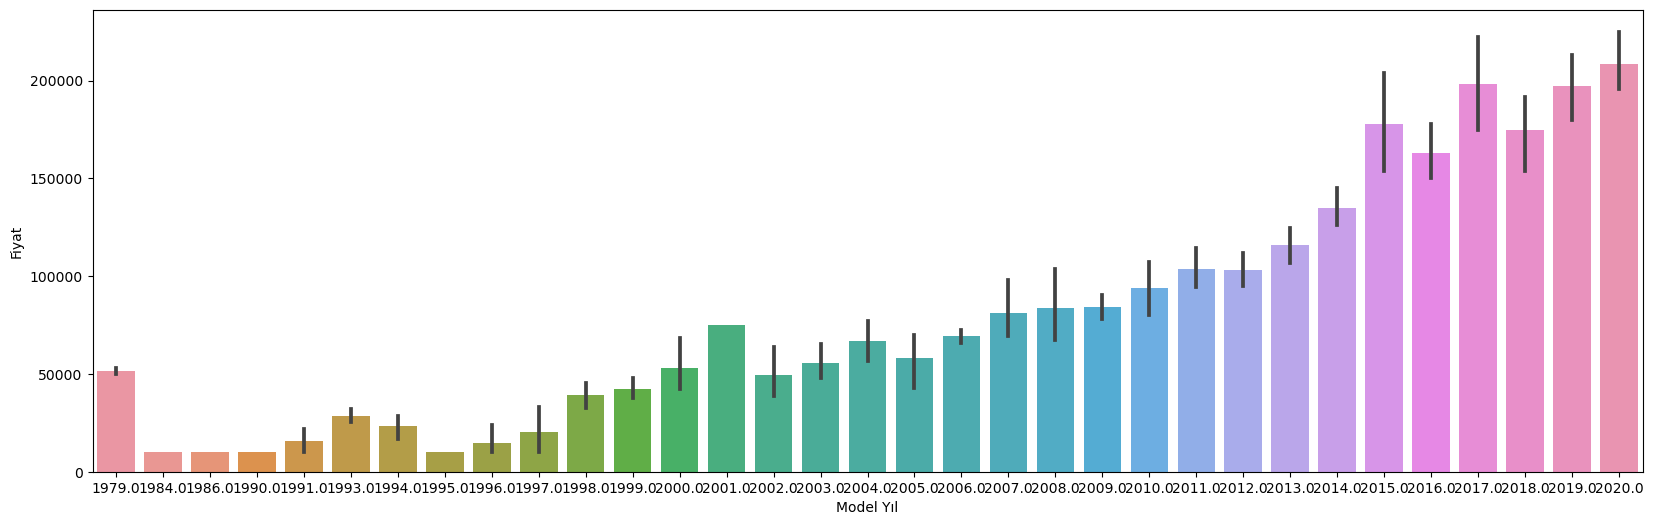

In [60]:
data = data.loc[data.index != 3014]

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x = data.loc[data["Marka"] == "Honda"]["Model Yıl"], y = data["Fiyat"])

Yakıt Türüne Göre Fiyat

<Axes: xlabel='Yakıt Turu', ylabel='Fiyat'>

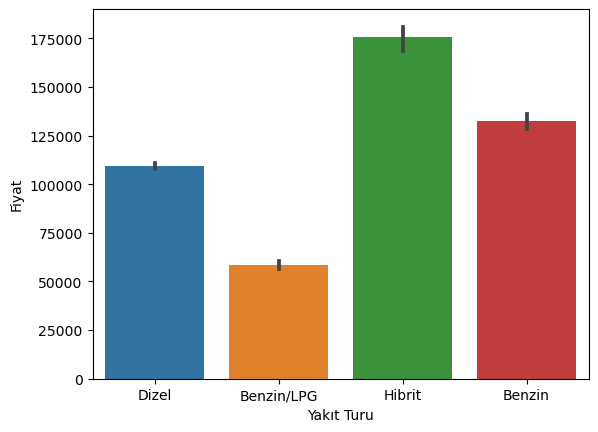

In [61]:
sns.barplot(x = data["Yakıt Turu"], y = data["Fiyat"], data = data)

Araç Kasa Tipine Göre Fiyatlar

<Axes: xlabel='Kasa Tipi', ylabel='Fiyat'>

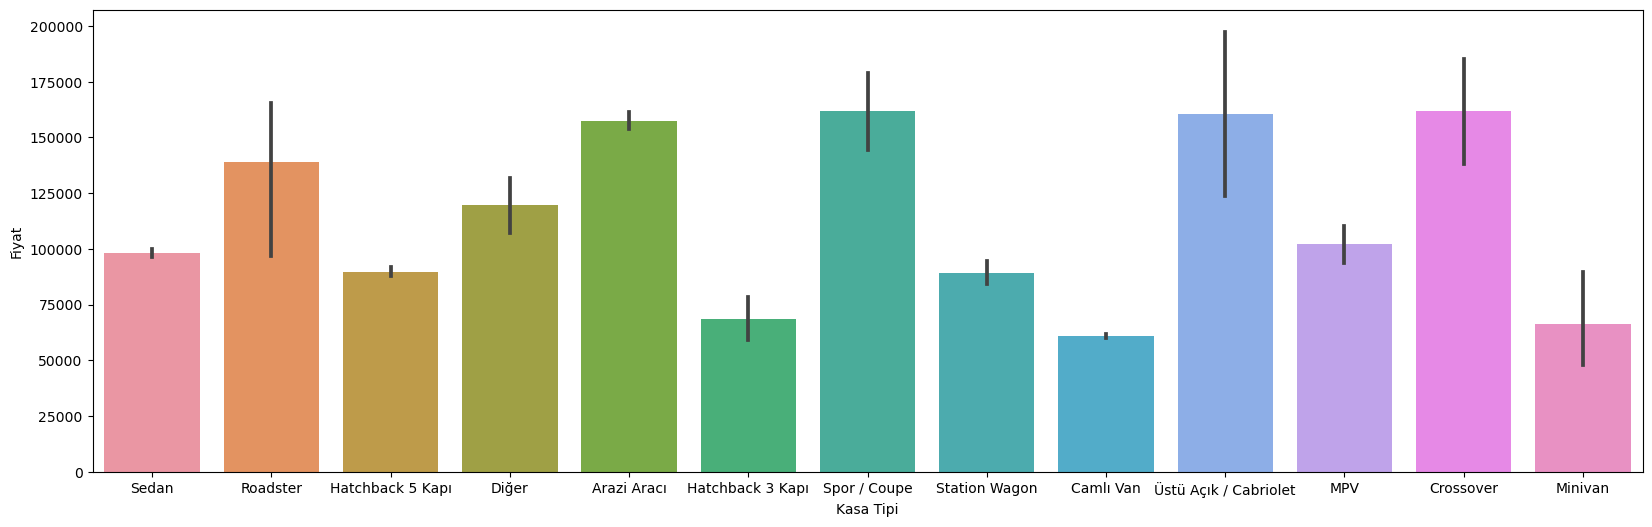

In [62]:
fig, ax = plt.subplots(figsize = (20, 6))
sns.barplot(x = data["Kasa Tipi"], y = data["Fiyat"], data = data)

Vites Türüne Göre Fiyatlar

<Axes: xlabel='Vites', ylabel='Fiyat'>

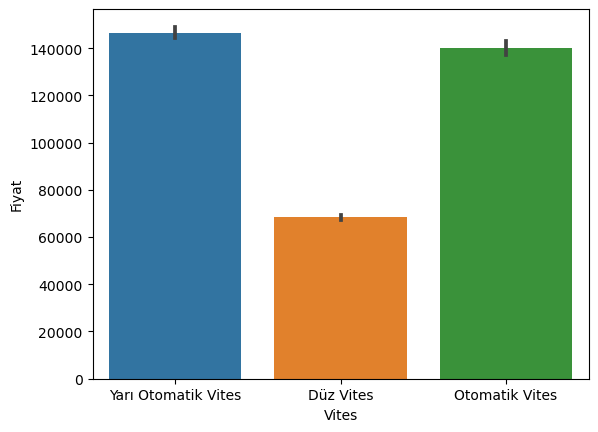

In [63]:
sns.barplot(x = data["Vites"], y = data["Fiyat"], data = data)


Araç Duruma Göre Fiyatlar


<Axes: xlabel='Durum', ylabel='Fiyat'>

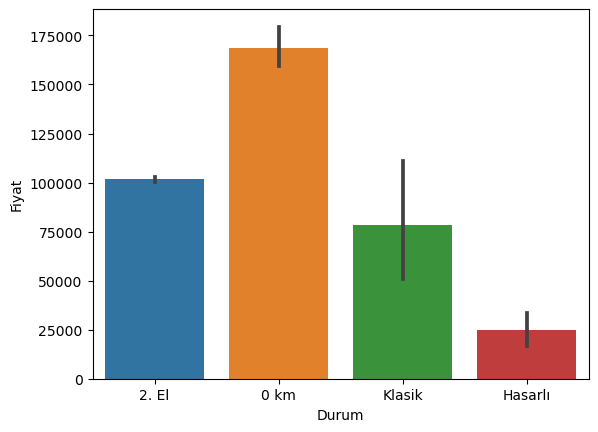

In [64]:
sns.barplot(x = data["Durum"], y = data["Fiyat"], data = data)


Satıcıya Göre Fiyatlar


<Axes: xlabel='Kimden', ylabel='Fiyat'>

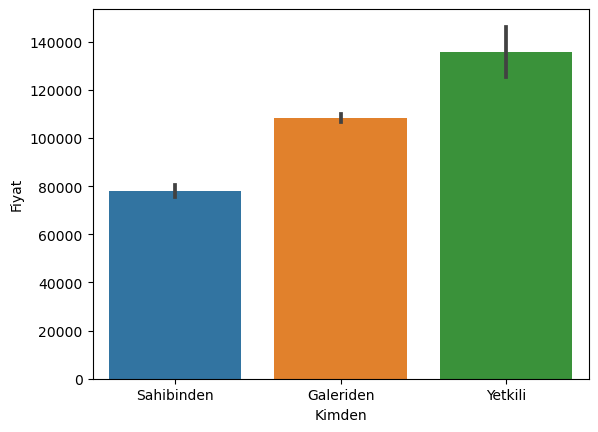

In [65]:
sns.barplot(x = data["Kimden"], y = data["Fiyat"], data = data)


Renklere Göre Fiyat Değişimleri


<Axes: xlabel='Renk', ylabel='Fiyat'>

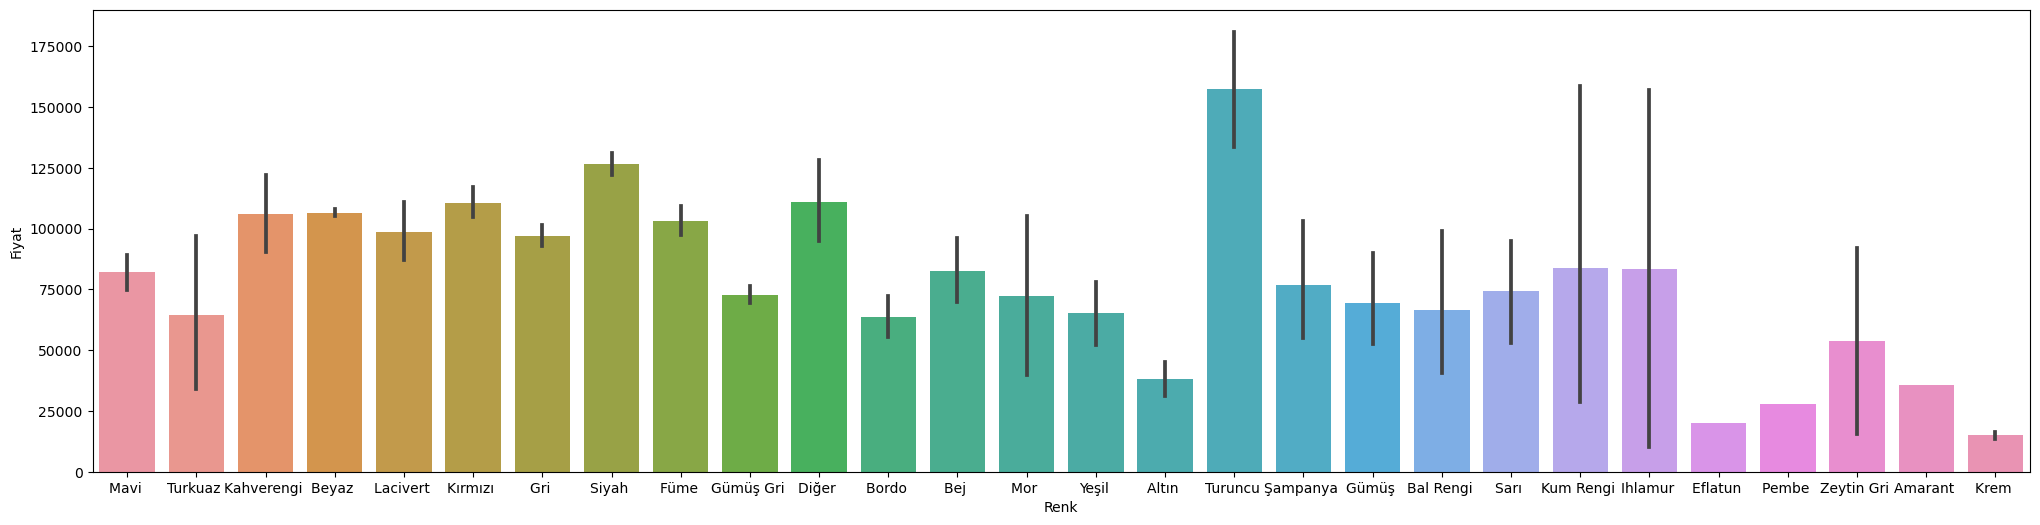

In [66]:
fig, ax = plt.subplots(figsize = (25, 6))
sns.barplot(x = data["Renk"], y = data["Fiyat"])

In [67]:
turuncu = data.loc[data["Renk"] == "Turuncu "]
turuncu["Kasa Tipi"].value_counts()

Kasa Tipi
Arazi Aracı         14
Hatchback 5 Kapı     9
Spor / Coupe         1
Diğer                1
MPV                  1
Crossover            1
Name: count, dtype: int64

<Axes: xlabel='Renk', ylabel='Fiyat'>

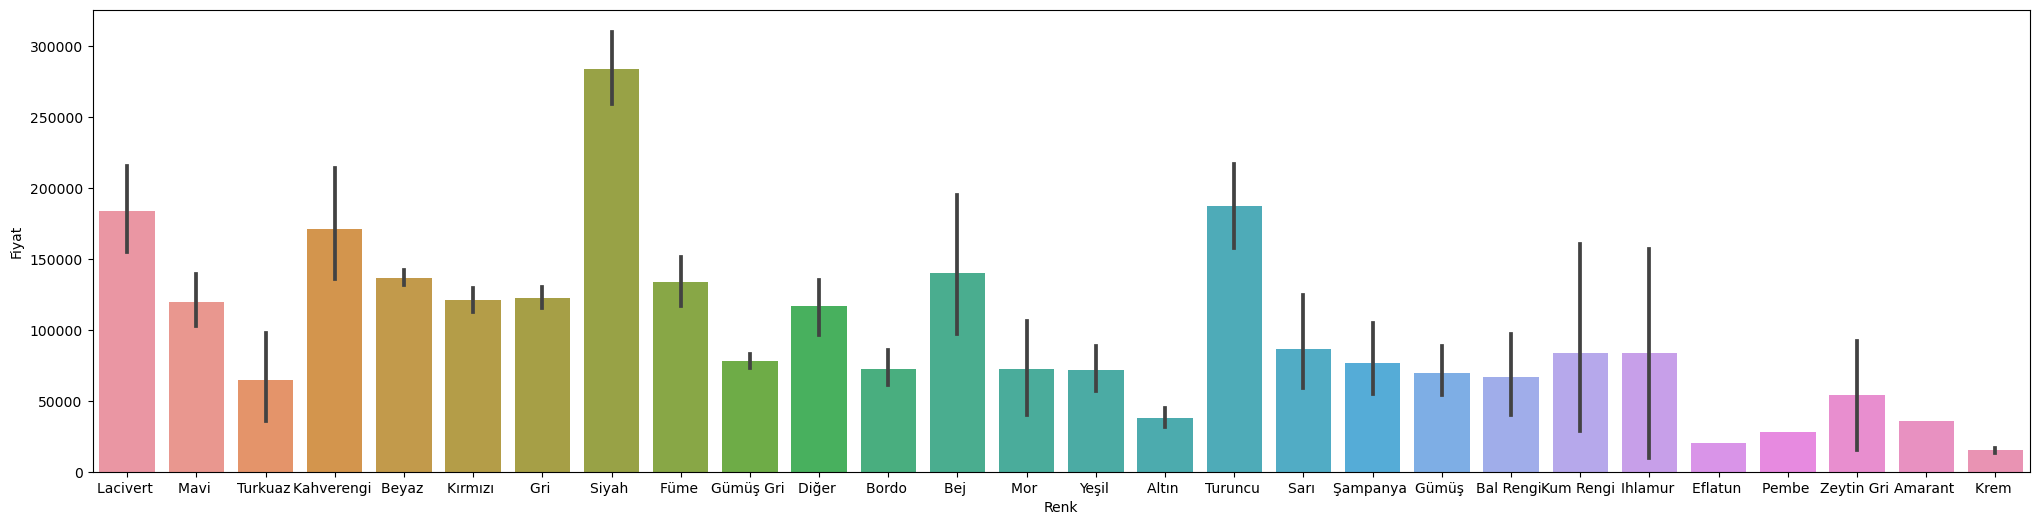

In [68]:
df = pd.read_csv("turkey_car_market.csv")

fig, ax = plt.subplots(figsize = (25, 6))
sns.barplot(x = df["Renk"], y = df["Fiyat"])

DATAYI HAZIRLAMAK


In [69]:
data.head()


,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500,False
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750,False
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000,False
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750,False
5,04/06/2020,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500,False


In [70]:
del data["Asırı_Deger"]


In [72]:
data.head(50)

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750
5,04/06/2020,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500
6,03/06/2020,Acura,CL,2.2,2014.0,Dizel,Otomatik Vites,1301-1600 cc,101-125 BG,Kırmızı,Sedan,Galeriden,2. El,183,170000
7,02/06/2020,Acura,CL,-,2014.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Beyaz,Hatchback 5 Kapı,Sahibinden,2. El,79000,82500
8,29/05/2020,Acura,RSX,Type-S,2019.0,Hibrit,Otomatik Vites,1601-1800 cc,100 BG ve altı,Beyaz,Sedan,Yetkili,0 km,15662,189000
9,29/05/2020,Acura,RSX,Type-S,2019.0,Hibrit,Otomatik Vites,1601-1800 cc,100 BG ve altı,Gri,Sedan,Yetkili,0 km,31971,189000
10,24/05/2020,Acura,CL,-,2001.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,252000,36750


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_tahmin = rf.predict(x_test)

r2_skor = r2_score(y_test, rf_tahmin)
hata_skor = np.sqrt(mean_squared_error(y_test, rf_tahmin))

print("R2_skoru: ", r2_skor)
print("Hata Kare: ", hata_skor)

R2_skoru:  0.9191034591068373
Hata Kare:  17319.875879494495


In [29]:
sonuc = pd.DataFrame({'Gerçek Değerler': np.array(y_test).flatten(), 'Tahminler': rf_tahmin.flatten()})
sonuc.head(10)

,Gerçek Değerler,Tahminler
0,63750,63750.000000
1,62750,68319.500000
2,96800,103939.000000
3,275000,269807.666667
4,94500,106989.480000
5,28500,27069.500000
6,76500,75100.000000
7,46000,44862.000000
8,104250,123067.500000
9,88000,88000.000000


İlk tahminde %90 R2 skoru çıkardık tahmin değerleri ve gerçek değerler yukarıdaki gibi. Kimi tahminlerde gayet yakın sonuçlar çıktı şimdi hata kare ortalamasını düşürmeye çalışalım.

In [30]:
import statsmodels.api as sm #istatiksel modelleme doğrusal ilişki
X_1 = sm.add_constant(x) #sabit terim

model = sm.OLS(y,X_1).fit() #doğrusal regrasyon modeli oluşturmak için kullanılır
model.pvalues

cols2 = list(x.columns)
pmax = 1
while (len(cols2)>0):# Tüm bağımsız değişkenler gözden geçirilene kadar devam eder.
    p= []
    X_1 = x[cols2] # Mevcut bağımsız değişkenlerin alt kümesini alır.
    X_1 = sm.add_constant(X_1) #sabit terim ekler
    model = sm.OLS(y,X_1).fit()#mRegresyon modelini yeniden oluşturur.
    
    p = pd.Series(model.pvalues.values[1:],index = cols2) #her bağımsız değişkenin modelde ne kadar anlamlı olduğunu gösteren değer
    # p-değerlerini bağımsız değişkenlerle eşleştirir (sabit terimi atlar).

    pmax = max(p)    
    feature_with_p_max = p.idxmax()
    if(pmax>0.05): #bağımsız değişken
        cols2.remove(feature_with_p_max)
    else:
        break
        
# Seçilen anlamlı bağımsız değişkenlerin isimlerini saklar.

selected_features_BE = cols2
print(selected_features_BE)

['Marka', 'Arac Tip Grubu', 'Arac Tip', 'Model Yıl', 'Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi', 'Kimden', 'Durum', 'Km']


Feature Selection da yine tüm değişkenler geldi.

Şimdi model yıl değişkenini araç yaşı olarak değiştirelim ve KM değişkenini standartlaştıralım.

İlanların tamamı 2020 yılına ait.

In [31]:
Arac_Yası = 2020 - data["Model Yıl"]

# standart sapma 1 olacak şekilde

KM2 = data["Km"] / np.std(data["Km"])
KM2.std()

1.000060362780368

In [32]:
data["Arac Yası"] = Arac_Yası

data["Km"] = KM2

del data["Model Yıl"]

data.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Arac Yası
1,16/06/2020,0,120,0,2,2,2,2,18,9,1,1,1.357529,151500,5.0
2,14/06/2020,0,120,1143,1,0,2,2,23,9,1,1,1.870612,19750,26.0
3,11/06/2020,0,120,0,2,0,2,17,13,9,1,1,0.003474,52000,7.0
4,11/06/2020,0,120,1143,2,1,4,4,4,9,1,1,2.212666,148750,10.0
5,04/06/2020,0,120,1143,2,0,4,2,17,8,0,1,3.420547,42500,21.0


Aynı modeli tekrar kuralım ve sonuçları inceleyelim.


In [33]:
df = data.copy()

del df["İlan Tarihi"]

for i in cols:
    df[i] = le.fit_transform(df[i])

y = df["Fiyat"] #modelin tahmin etmeye çalıştığı değer
x = df.iloc[:, 0:12] #modelin öğrenmesi için kullanacağı özellikler
x2 = df.iloc[:, 13:14]  #modelin performansının iyileşip iyileşmediğinin kontrolü
x = pd.concat([x, x2], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

rf.fit(x_train, y_train)
rf_tahmin_2 = rf.predict(x_test)

r2_skor2 = r2_score(y_test, rf_tahmin_2)
hata_skor2 = np.sqrt(mean_squared_error(y_test, rf_tahmin_2))

print("İlk R2_skoru: ", r2_skor)
print("İlk Hata Kare: ", hata_skor)
print("Yeni R2_skoru: ", r2_skor2)
print("Yeni Hata Kare: ", hata_skor2)

İlk R2_skoru:  0.9191034591068373
İlk Hata Kare:  17319.875879494495
Yeni R2_skoru:  0.9178488887157057
Yeni Hata Kare:  17443.89414160438


In [34]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_tahmin = xgb.predict(x_test)

r2_skor2 = r2_score(y_test, xgb_tahmin) #test ile tahmin arası r2 skor
hata_skor2 = np.sqrt(mean_squared_error(y_test, xgb_tahmin)) #gerçek ve tahmin edilen değerler arası farkların karesini alır

print(r2_skor2)
print(hata_skor2)

0.9266545176506042
16482.513313494117


Hata kare ortalması çok küçük düştü. Tahmin ve gerçek sonuç karşılaştırılmaları aşağıdaki gibidir.


In [35]:
sonuc = pd.DataFrame({'Gerçek Değerler': np.array(y_test).flatten(), 'Tahminler': xgb_tahmin.flatten()})
sonuc.head(50)

,Gerçek Değerler,Tahminler
0,222000,226394.015625
1,177500,139952.921875
2,110000,109043.890625
3,134750,135408.390625
4,60750,88147.367188
5,117750,116034.312500
6,95500,89950.195312
7,38500,42457.996094
8,27000,12174.932617
9,24900,22022.167969


Çıkan sonuçlarda 4. örnek arasında yüksek fark var burada kötü bir tahminde bulunmuş model.

Ama yinede ilk 50 örnek için tahminler kötü değil fakat bazı örneklerde farklılar mevcut.

Modeli tune ederek son çıktılara bakıp örneği sonlandıralım.

In [36]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Verileri kontrol et ve NaN / infinite değerlerini düzelt
if np.any(np.isnan(x_train)) or np.any(np.isnan(y_train)):
    print("NaN değerler tespit edildi, NaN değerler 0 ile değiştiriliyor.")
    x_train = np.nan_to_num(x_train, nan=0.0)
    y_train = np.nan_to_num(y_train, nan=0.0)

if np.any(np.isinf(x_train)) or np.any(np.isinf(y_train)):
    print("Infinite değerler tespit edildi, Infinite değerler 0 ile değiştiriliyor.")
    x_train = np.nan_to_num(x_train, posinf=0.0, neginf=0.0)
    y_train = np.nan_to_num(y_train, posinf=0.0, neginf=0.0)

# Veriyi ölçeklendir
scaler = StandardScaler() #Veriyi ölçeklendirdik ort:0 standart sapma:1
x_train_scaled = scaler.fit_transform(x_train)

# GridSearchCV parametreleri
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.05], #öğrenme hızını belirler (ağacın katkısı)
    'max_depth': [3, 5, 7, 10], #karar ağacının max derinliği
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.6, 0.4], #her ağaç için kullanılacak eğitim verisinin oranını belirler
    'colsample_bytree': [0.5, 0.7, 0.9], # her ağacın eğitilmesinde kullanılacak özelliklerin oranını belirler
    'objective': ['reg:squarederror'] #tahmin ve gerçek değerler arasındaki farkların karesinin toplamını min
}

# XGBRegressor modelini oluştur ve GridSearchCV ile hiperparametreleri ara
xgb_model = XGBRegressor()
xgb_tune = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2)

# Modeli eğit
xgb_tune.fit(x_train_scaled, y_train)


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5, 7, 9],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7, 0.6, 0.4]},
             verbose=2)

In [37]:
xgb_tune.best_params_


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [38]:
 xgb = XGBRegressor(colsample_bytree = 0.7,
 learning_rate = 0.1,
 max_depth = 10,
 min_child_weight = 7,
 objective = 'reg:squarederror',
 subsample = 0.7)

xgb.fit(x_train, y_train)
xgb_tune_tahmin = xgb.predict(x_test)

r2_skor = r2_score(y_test, xgb_tune_tahmin)
hata_skor = np.sqrt(mean_squared_error(y_test, xgb_tune_tahmin))

print(r2_skor)
print(hata_skor)

0.9333280324935913
15714.779678671348


In [39]:
import joblib

# Modeli kaydet
joblib.dump(xgb, "arac_fiyat_tahmin_modeli.pkl")
joblib.dump(scaler, "veri_olceklendirici.pkl")
print("Model ve scaler başarıyla kaydedildi.")

Model ve scaler başarıyla kaydedildi.


In [40]:
sonuc = pd.DataFrame({'Gerçek Değerler': np.array(y_test).flatten(), 'Tahminler': xgb_tahmin.flatten()})
sonuc.head(50)
#Marka	Arac Tip Grubu	Arac Tip	Yakıt Turu	Vites	CCM	Beygir Gucu	Renk	Kasa Tipi	Kimden	Durum	Km	Fiyat	Arac Yası


,Gerçek Değerler,Tahminler
0,222000,226394.015625
1,177500,139952.921875
2,110000,109043.890625
3,134750,135408.390625
4,60750,88147.367188
5,117750,116034.312500
6,95500,89950.195312
7,38500,42457.996094
8,27000,12174.932617
9,24900,22022.167969


In [18]:
from tkinter import *
from tkinter.ttk import Combobox
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from tkinter import Tk, Label, Frame, Entry, Button

data = pd.read_csv("turkey_car_market.csv")
veri = pd.read_csv("turkey_car_market.csv")

######################## MODEL BUILDING ########################

data.columns
df = data.copy()
le = LabelEncoder()

cols = ['Marka', 'Arac Tip Grubu', 'Arac Tip','Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi',
       'Kimden', 'Durum']
for i in cols:
    df[i] = le.fit_transform(df[i])

# Özellikler (X) ve hedef değişken (y) belirleniyor

x = df.iloc[:, 1:14]
y = df.iloc[:, 14:15]

# Veriyi eğitim ve test kümelerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33,random_state = 12)

# XGBoost modeli tanımlanıyor ve eğitiliyor
xgb =  XGBRegressor(
    colsample_bytree=0.7,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=7,
    objective='reg:squarederror',
    subsample=0.7
)

xgb.fit(x_train, y_train)



######################## Veri Ön işleme ########################


# Benzersiz değerleri listeleme ve encode işlemi
arac_tip = data["Arac Tip"].unique()
arac_tip2 = veri["Arac Tip"].unique()
vites = data["Vites"].unique()
vites2 = veri["Vites"].unique()
marka = data["Marka"].unique()
marka2 = veri["Marka"].unique()
arac_tip_grubu = data["Arac Tip Grubu"].unique()
arac_tip_grubu2 = veri["Arac Tip Grubu"].unique()
yakıt_turu = data["Yakıt Turu"].unique()
yakıt_turu2 = veri["Yakıt Turu"].unique()
ccm = data["CCM"].unique()
ccm2 = veri["CCM"].unique()
beygir_gucu = data["Beygir Gucu"].unique()
beygir_gucu2 = veri["Beygir Gucu"].unique()
renk = data["Renk"].unique()
renk2 = veri["Renk"].unique()
kasa_tipi = data["Kasa Tipi"].unique()
kasa_tipi2 = veri["Kasa Tipi"].unique()
kimden = data["Kimden"].unique()
kimden2 = veri["Kimden"].unique()
durum = data["Durum"].unique()
durum2 = veri["Durum"].unique()

# Kategorik verilerin LabelEncoder ile encode edilmesi
arac_tip = le.fit_transform(arac_tip)
vites = le.fit_transform(vites)
marka = le.fit_transform(marka)
arac_tip_grubu = le.fit_transform(arac_tip_grubu)
yakıt_turu = le.fit_transform(yakıt_turu)
vites = le.fit_transform(vites)
ccm = le.fit_transform(ccm)
beygir_gucu = le.fit_transform(beygir_gucu)
renk = le.fit_transform(renk)
kasa_tipi = le.fit_transform(kasa_tipi)
kimden = le.fit_transform(kimden)
durum = le.fit_transform(durum)

# Encode edilen verilerin listeye dönüştürülmesi
a = list(arac_tip) #ok
a2 = list(arac_tip2) #ok
b = list(vites) #ok
b2 = list(vites2) #ok
c = list(marka) #ok
c2 = list(marka2) #ok
d = list(arac_tip_grubu) #ok
d2 = list(arac_tip_grubu) #ok
e = list(yakıt_turu) #ok
e2 = list(yakıt_turu2) #ok
p = list(ccm) #ok
p2 = list(ccm2) #ok
h = list(beygir_gucu) #ok
h2 = list(beygir_gucu2) #ok
i = list(renk) #ok
i2 = list(renk2) #ok
j = list(kasa_tipi) #ok
j2 = list(kasa_tipi2) #ok
k = list(kimden) #ok
k2 = list(kimden2) #ok
l = list(durum) #ok
l2 = list(durum2) #ok

######################## Kontrol Panelinin Hazırlanması ########################

#from tkinter import *
#from tkinter.ttk import Combobox

# Ana pencere tanımlanıyor ve boyutlandırılıyor
anaPencere = Tk()
anaPencere.geometry("1200x900")
anaPencere.state("normal")
anaPencere.configure(bg = "#0059b3")

# Fonksiyonlar ve GUI bileşenleri
def marka_sec():
    global marka
    #label.destroy()
    secim = combo.get()
    
    print("=====================", secim)
    g = secenek.index(secim)
    #print(le.transform(c2[0:1]))
    marka = c[g]
    print(marka)

marka
secenek = list(veri["Marka"].unique())
combo=Combobox(anaPencere, values = secenek)
combo.place(x = 100, y = 70)
#combo.pack()
buton=Button(text="Marka Seç",command=marka_sec)
buton.place(x = 100, y = 110)
#buton.pack()
label=Label(text="")
label.pack()



############################################

    
def vites_düzenle():
    global vites
    #vites.destroy()
    vites_turu=combo2.get()
    
    print("=====================",vites_turu)
    g = secenek2.index(vites_turu)
    vites = b[g]
    print(vites)

# GUI bileşenleri tanımlanıyor
secenek2 = list(veri["Vites"].unique())
combo2=Combobox(anaPencere,values=secenek2)
combo2.place(x = 100, y = 310)
#combo2.pack()
buton2=Button(text="Vites Turu Seç",command=vites_düzenle)
#buton2.pack()
buton2.place(x = 100, y = 350)
label2=Label(text="")
label2.pack()


############################################

def arac_tip_düzenle():
    global arac_tip
    #vites.destroy()
    tip_turu=combo3.get()
    
    print("=====================",tip_turu)
    g = secenek3.index(tip_turu)
    arac_tip = a[g]
    print(arac_tip)


secenek3 = list(veri["Arac Tip"].unique())
combo3=Combobox(anaPencere,values=secenek3)
combo3.place(x = 100, y = 230)
#combo3.pack()
buton3=Button(text="Araç Tipi Seç",command=arac_tip_düzenle)
#buton3.pack()
buton3.place(x = 100, y = 270)
label3=Label(text="")
label3.pack()



############################################



def tip_grubu_duzenle():
    global tip_grubu
    tip_grubu_turu = combo4.get()
    r = secenek4.index(tip_grubu_turu)
    tip_grubu = d[r]




secenek4 = list(veri["Arac Tip Grubu"].unique())
combo4=Combobox(anaPencere,values=secenek4)
combo4.place(x = 100, y = 150)
#combo4.pack()
buton4=Button(text="Arac Tip Grubu Seç",command=tip_grubu_duzenle)
#buton4.pack()
buton4.place(x = 100, y = 190)
label4=Label(text="")
label4.pack()




############################################

def yakıt_duzenle():
    global yakıt
    #vites.destroy()
    yakıt_turu = combo5.get()
    
    print("=====================",yakıt_turu)
    g = secenek5.index(yakıt_turu)
    yakıt = e[g]
    print(yakıt)


secenek5 = list(veri["Yakıt Turu"].unique())
combo5=Combobox(anaPencere,values=secenek5)
combo5.place(x = 100, y = 390)
#combo5.pack()
buton5=Button(text="Yakıt Turu Seç",command=yakıt_duzenle)
#buton5.pack()
buton5.place(x = 100, y = 430)
label5=Label(text="")
label5.pack()



############################################

def ccm_duzenle():
    global ccm
    #vites.destroy()
    ccm_turu = combo6.get()
    
    print("=====================",ccm_turu)
    g = secenek6.index(ccm_turu)
    ccm = p[g]
    print(ccm)


secenek6 = list(veri["CCM"].unique())
combo6=Combobox(anaPencere,values=secenek6)
combo6.place(x = 100, y = 470)
#combo6.pack()
buton6=Button(text="CCM Seç",command=ccm_duzenle)
#buton6.pack()
buton6.place(x = 100, y = 510)
label6=Label(text="")
label6.pack()



############################################

def hp_duzenle():
    global hp
    #vites.destroy()
    hp_turu = combo7.get()
    
    print("=====================",hp_turu)
    g = secenek7.index(hp_turu)
    hp = h[g]
    print(hp)


secenek7 = list(veri["Beygir Gucu"].unique())
combo7=Combobox(anaPencere,values=secenek7)
combo7.place(x = 100, y = 550)
#combo7.pack()
buton7=Button(text="HP Seç",command=hp_duzenle)
#buton7.pack()
buton7.place(x = 100, y = 590)
label7=Label(text="")
label7.pack()



############################################

def renk_duzenle():
    global renk
    #vites.destroy()
    renk_turu = combo8.get()
    
    print("=====================",renk_turu)
    g = secenek8.index(renk_turu)
    renk = i[g]
    print(renk)


secenek8 = list(veri["Renk"].unique())
combo8=Combobox(anaPencere,values=secenek8)
combo8.place(x = 400, y = 70)
#combo8.pack()
buton8=Button(text="Renk Seç",command=renk_duzenle)
buton8.pack()
buton8.place(x = 400, y = 110)
label8=Label(text="")
label8.pack()



############################################

def kasa_duzenle():
    global kasa
    #vites.destroy()
    kasa_turu = combo9.get()
    
    print("=====================",kasa_turu)
    g = secenek9.index(kasa_turu)
    kasa = j[g]
    print(kasa)


secenek9 = list(veri["Kasa Tipi"].unique())
combo9=Combobox(anaPencere,values=secenek9)
combo9.place(x = 400, y = 150)
#combo9.pack()
buton9=Button(text="Kasa Turu Seç",command=kasa_duzenle)
#buton9.pack()
buton9.place(x = 400, y = 190)
label9=Label(text="")
label9.pack()



############################################

def kimden_duzenle():
    global kimden
    #vites.destroy()
    kimden_tur = combo10.get()
    
    print("=====================",kimden_tur)
    g = secenek10.index(kimden_tur)
    kimden = k[g]
    print(kimden)


secenek10 = list(veri["Kimden"].unique())
combo10=Combobox(anaPencere,values=secenek10)
combo10.place(x = 400, y = 230)
#combo10.pack()
buton10=Button(text="Satıcı Turu Seç",command=kimden_duzenle)
#buton10.pack()
buton10.place(x = 400, y = 270)
label10=Label(text="")
label10.pack()



############################################

def durum_duzenle():
    global durum
    #vites.destroy()
    durum_tur = combo11.get()
    
    print("=====================",durum_tur)
    g = secenek11.index(durum_tur)
    durum = l[g]
    print(durum)


secenek11 = list(veri["Durum"].unique())
combo11=Combobox(anaPencere,values=secenek11)
combo11.place(x = 400, y = 310)
#combo11.pack()
buton11=Button(text="Durum Turu Seç",command=durum_duzenle)
#buton11.pack()
buton11.place(x = 400, y = 350)
label11=Label(text="")
label11.pack()



############################################

def model_yıl():
    global model
    #vites.destroy()
    model = combo12.get()
    print(model)


secenek12 = list(veri["Model Yıl"].unique())
combo12=Combobox(anaPencere,values=secenek12)
combo12.place(x = 400, y = 390)
#combo12.pack()
buton12=Button(text="Model Yıl Seç",command=model_yıl)
buton12.place(x = 400, y = 430)
#buton12.pack()
label12=Label(text="")
label12.pack()



############################################

def km_duzenle():
    global km
    #vites.destroy()
    km = combo13.get()
    print(km)


secenek13 = list(veri["Km"].unique())
combo13=Combobox(anaPencere,values=secenek13)
combo13.place(x = 400, y = 470)
#combo12.pack()
buton13=Button(text="KM Seç",command=km_duzenle)
buton13.place(x = 400, y = 510)
#buton12.pack()
label13=Label(text="")
label13.pack()



######################## CALCULATING AND PRINTING ########################



def hesapla():
    global marka, tip_grubu, arac_tip, model, yakıt, vites, ccm, hp, renk, kasa, kimden, durum, km
    
    # burada artık değişkenlerin hepsi global olarak tanımlandı
    try:
        yeni_veri = [marka, tip_grubu, arac_tip, model, yakıt, vites, ccm, hp, renk, kasa, kimden, durum, km]
        yeni_veri = pd.DataFrame([yeni_veri], columns=["Marka", "Arac Tip Grubu", "Arac Tip", "Model Yıl", 
                                                       "Yakıt Turu", "Vites", "CCM", "Beygir Gucu", 
                                                       "Renk", "Kasa Tipi", "Kimden", "Durum", "Km"])
        yeni_veri = yeni_veri.astype({
            "Marka": "int64",
            "Arac Tip Grubu": "int64",
            "Arac Tip": "int64",
            "Model Yıl": "float64",
            "Yakıt Turu": "int64",
            "Vites": "int64",
            "CCM": "int64",
            "Beygir Gucu": "int64",
            "Renk": "int64",
            "Kasa Tipi": "int64",
            "Kimden": "int64",
            "Durum": "int64",
            "Km": "int64"
        })
    except NameError as e:
        print(f"Hata: {e}")
        return
    except Exception as e:
        print(f"Beklenmedik bir hata oluştu: {e}")
        return

    print("Yeni veri:", yeni_veri)
    pred = xgb.predict(yeni_veri)

    if pred < 0:
        pred = -1 * pred

    s2 = Label(anaPencere, text=pred, font="helvetica 20", borderwidth=6, padx=100, pady=20)
    s2.place(x=800, y=300)

    return pred







hesapla_buton = Button(anaPencere, text = "HESAPLA", command = hesapla, font = "helvetica 15", borderwidth = 60, padx = 50, pady = 20, background = "#f7fafc")
hesapla_buton.place(x = 820, y = 210)
s1 = Label(anaPencere, text = " ", font = "helvetica 12", borderwidth = 6, padx = 100, pady = 20)
s1.place(x = 800, y = 300)

mainloop()

===================== Hyundai
13
===================== 1.6 GDI Style
707
===================== Otomatik Vites
1
===================== Benzin
0
===================== 1301-1600 cc
2
===================== 101-125 BG
2
===================== Beyaz 
4
===================== Arazi Aracı
0
===================== Galeriden
0
===================== 2. El
1
2015.0
82500
Yeni veri:    Marka  Arac Tip Grubu  Arac Tip  Model Yıl  Yakıt Turu  Vites  CCM  \
0     13             362       707     2015.0           0      1    2   

   Beygir Gucu  Renk  Kasa Tipi  Kimden  Durum     Km  
0            2     4          0       0      1  82500  


In [2]:
honda = data.loc[data["Marka"] == "Honda"]
honda

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
2970,16/06/2020,Honda,Civic,1.6 i-VTEC Executive,2018.0,Benzin/LPG,Otomatik Vites,1301-1600 cc,101-125 BG,Gümüş Gri,Sedan,Galeriden,Hasarlı,11,99000
2971,16/06/2020,Honda,Civic,1.6 Elegance,2008.0,Benzin,Düz Vites,1301-1600 cc,101-125 BG,Siyah,Sedan,Galeriden,Hasarlı,89000,16600
2972,16/06/2020,Honda,CR-V,2.0i Executive,2010.0,Benzin/LPG,Otomatik Vites,1801-2000 cc,126-150 BG,Siyah,Arazi Aracı,Galeriden,Hasarlı,33333,38000
2973,16/06/2020,Honda,Accord,2.2 CDTi,2005.0,Dizel,Düz Vites,2001-2500 cc,126-150 BG,Siyah,Sedan,Galeriden,Hasarlı,112000,15500
2974,16/06/2020,Honda,Civic,1.6 i-VTEC Executive,2018.0,Dizel,Düz Vites,1301-1600 cc,101-125 BG,Beyaz,Sedan,Galeriden,2. El,7000,11000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,21/03/2020,Honda,Civic,1.6 i ES,1999.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Bordo,Sedan,Sahibinden,2. El,268000,37750
3242,20/03/2020,Honda,Civic,1.6 i-VTEC Elegance,2010.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Füme,Sedan,Sahibinden,2. El,143500,95780
3243,20/03/2020,Honda,Civic,1.5 EL,1993.0,Benzin/LPG,Düz Vites,1301-1600 cc,Bilmiyorum,Gri,Sedan,Galeriden,2. El,160000,25500
3245,19/03/2020,Honda,Civic,1.6 i-VTEC Premium,2011.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Siyah,Sedan,Sahibinden,2. El,181500,88750


In [3]:
hyundai = data.loc[data["Marka"] == "Hyundai"]
hyundai

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
39,25/03/2020,Hyundai,Tucson,1.6 GDI Style,2015.0,Benzin,Otomatik Vites,1301-1600 cc,101-125 BG,Beyaz,Arazi Aracı,Galeriden,2. El,75000,160000
45,25/03/2020,Hyundai,Tucson,1.6 GDI Style,2015.0,Benzin,Otomatik Vites,1301-1600 cc,101-125 BG,Beyaz,Arazi Aracı,Galeriden,2. El,75000,160000
260,03/06/2020,Hyundai,I20,1.2 Team,2011.0,Benzin,Düz Vites,1300 cc ve altı,100 BG ve altı,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,220000,49500
320,25/03/2020,Hyundai,Tucson,1.6 GDI Style,2015.0,Benzin,Otomatik Vites,1301-1600 cc,101-125 BG,Beyaz,Arazi Aracı,Galeriden,2. El,75000,160000
438,03/06/2020,Hyundai,I20,1.2 Team,2011.0,Benzin,Düz Vites,1300 cc ve altı,100 BG ve altı,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,220000,49500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,03/06/2020,Hyundai,I20,1.2 Team,2011.0,Benzin,Düz Vites,1300 cc ve altı,100 BG ve altı,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,220000,49500
7086,03/06/2020,Hyundai,I20,1.2 Team,2011.0,Benzin,Düz Vites,1300 cc ve altı,100 BG ve altı,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,220000,49500
7105,03/06/2020,Hyundai,I20,1.2 Team,2011.0,Benzin,Düz Vites,1300 cc ve altı,100 BG ve altı,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,220000,49500
8996,03/06/2020,Hyundai,I20,1.2 Team,2011.0,Benzin,Düz Vites,1300 cc ve altı,100 BG ve altı,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,220000,49500


In [7]:
Audi = data.loc[data["Marka"] == "Audi"]
Audi

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
63,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750
64,29/05/2020,Audi,A4,2.0 TDI Quattro,2014.0,Dizel,Otomatik Vites,Bilmiyorum,Bilmiyorum,Beyaz,Sedan,Galeriden,2. El,283000,225000
65,16/06/2020,Audi,A6,2.0 TDI,2008.0,Dizel,Yarı Otomatik Vites,1801-2000 cc,126-150 BG,Siyah,Sedan,Galeriden,2. El,336000,117500
66,16/06/2020,Audi,A4,2.0 TDI,2009.0,Dizel,Yarı Otomatik Vites,2001-2500 cc,126-150 BG,Siyah,Sedan,Galeriden,2. El,298000,119900
67,15/06/2020,Audi,A4,A4 Sedan 2.0 TDI,2012.0,Dizel,Otomatik Vites,1801-2000 cc,126-150 BG,Beyaz,Sedan,Galeriden,2. El,164000,177500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750
7203,27/05/2020,Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017.0,Dizel,Otomatik Vites,1301-1600 cc,151-175 BG,Lacivert,Sedan,Galeriden,2. El,52500,208500
7223,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750
7362,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750


In [9]:
Ford = data.loc[data["Marka"] == "Ford"]
Ford

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
2335,16/06/2020,Ford,Focus,1.6 TDCi Trend X,2014.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Beyaz,Sedan,Galeriden,2. El,181000,105000
2336,15/06/2020,Ford,Focus,1.6 Ti-VCT Titanium,2012.0,Benzin,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Gri,Sedan,Galeriden,2. El,87767,117500
2337,16/06/2020,Ford,Focus,1.5 TDCi Trend X,2019.0,Dizel,Otomatik Vites,1301-1600 cc,Bilmiyorum,Beyaz,Sedan,Galeriden,2. El,900,204000
2338,16/06/2020,Ford,Focus,1.6\n,2011.0,Benzin/LPG,Düz Vites,1601-1800 cc,76-100 BG,Siyah,Hatchback 5 Kapı,Sahibinden,2. El,130000,83500
2339,16/06/2020,Ford,Focus,1.6 TDCi Trend X,2013.0,Dizel,Düz Vites,Bilmiyorum,76-100 BG,Gri,Sedan,Sahibinden,2. El,146619,93750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,21/03/2020,Ford,Focus,1.5 TDCi Trend X,2015.0,Dizel,Otomatik Vites,1301-1600 cc,101-125 BG,Beyaz,Sedan,Sahibinden,2. El,137800,113500
2965,20/03/2020,Ford,Focus,1.5 TDCi Trend X,2016.0,Dizel,Otomatik Vites,1301-1600 cc,101-125 BG,Beyaz,Sedan,Galeriden,2. El,149000,124500
2966,19/03/2020,Ford,Scorpio,2.0,1990.0,Benzin/LPG,Düz Vites,1801-2000 cc,101-125 BG,Bordo,Sedan,Galeriden,Hasarlı,2222,6250
2967,19/03/2020,Ford,Focus,1.6 Ti-VCT Titanium,2014.0,Benzin,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Gri,Sedan,Sahibinden,2. El,90000,102750


In [ ]:
from tkinter import *
from tkinter.ttk import Combobox
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from tkinter import Tk, Label, Frame, Entry, Button

data = pd.read_csv("turkey_car_market.csv")
veri = pd.read_csv("turkey_car_market.csv")
def get_inflation_rate():
    """Enflasyon oranını döndürür. Örnek: 0.1 = %10 enflasyon."""
    return 0.4438  # Örnek enflasyon oranı (%10)
######################## MODEL BUILDING ########################

data.columns
df = data.copy()
le = LabelEncoder()

cols = ['Marka', 'Arac Tip Grubu', 'Arac Tip','Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi',
       'Kimden', 'Durum']
for i in cols:
    df[i] = le.fit_transform(df[i])

# Özellikler (X) ve hedef değişken (y) belirleniyor

x = df.iloc[:, 1:14]
y = df.iloc[:, 14:15]

# Veriyi eğitim ve test kümelerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33,random_state = 12)

# XGBoost modeli tanımlanıyor ve eğitiliyor
xgb =  XGBRegressor(
    colsample_bytree=0.7,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=7,
    objective='reg:squarederror',
    subsample=0.7
)

xgb.fit(x_train, y_train)



######################## Veri Ön işleme ########################


# Benzersiz değerleri listeleme ve encode işlemi
arac_tip = data["Arac Tip"].unique()
arac_tip2 = veri["Arac Tip"].unique()
vites = data["Vites"].unique()
vites2 = veri["Vites"].unique()
marka = data["Marka"].unique()
marka2 = veri["Marka"].unique()
arac_tip_grubu = data["Arac Tip Grubu"].unique()
arac_tip_grubu2 = veri["Arac Tip Grubu"].unique()
yakıt_turu = data["Yakıt Turu"].unique()
yakıt_turu2 = veri["Yakıt Turu"].unique()
ccm = data["CCM"].unique()
ccm2 = veri["CCM"].unique()
beygir_gucu = data["Beygir Gucu"].unique()
beygir_gucu2 = veri["Beygir Gucu"].unique()
renk = data["Renk"].unique()
renk2 = veri["Renk"].unique()
kasa_tipi = data["Kasa Tipi"].unique()
kasa_tipi2 = veri["Kasa Tipi"].unique()
kimden = data["Kimden"].unique()
kimden2 = veri["Kimden"].unique()
durum = data["Durum"].unique()
durum2 = veri["Durum"].unique()

# Kategorik verilerin LabelEncoder ile encode edilmesi
arac_tip = le.fit_transform(arac_tip)
vites = le.fit_transform(vites)
marka = le.fit_transform(marka)
arac_tip_grubu = le.fit_transform(arac_tip_grubu)
yakıt_turu = le.fit_transform(yakıt_turu)
vites = le.fit_transform(vites)
ccm = le.fit_transform(ccm)
beygir_gucu = le.fit_transform(beygir_gucu)
renk = le.fit_transform(renk)
kasa_tipi = le.fit_transform(kasa_tipi)
kimden = le.fit_transform(kimden)
durum = le.fit_transform(durum)

# Encode edilen verilerin listeye dönüştürülmesi
a = list(arac_tip) #ok
a2 = list(arac_tip2) #ok
b = list(vites) #ok
b2 = list(vites2) #ok
c = list(marka) #ok
c2 = list(marka2) #ok
d = list(arac_tip_grubu) #ok
d2 = list(arac_tip_grubu) #ok
e = list(yakıt_turu) #ok
e2 = list(yakıt_turu2) #ok
p = list(ccm) #ok
p2 = list(ccm2) #ok
h = list(beygir_gucu) #ok
h2 = list(beygir_gucu2) #ok
i = list(renk) #ok
i2 = list(renk2) #ok
j = list(kasa_tipi) #ok
j2 = list(kasa_tipi2) #ok
k = list(kimden) #ok
k2 = list(kimden2) #ok
l = list(durum) #ok
l2 = list(durum2) #ok

######################## Kontrol Panelinin Hazırlanması ########################

#from tkinter import *
#from tkinter.ttk import Combobox

# Ana pencere tanımlanıyor ve boyutlandırılıyor
anaPencere = Tk()
anaPencere.geometry("1200x900")
anaPencere.state("normal")
anaPencere.configure(bg = "#0059b3")

# Fonksiyonlar ve GUI bileşenleri
def marka_sec():
    global marka
    #label.destroy()
    secim = combo.get()
    
    print("=====================", secim)
    g = secenek.index(secim)
    #print(le.transform(c2[0:1]))
    marka = c[g]
    print(marka)

marka
secenek = list(veri["Marka"].unique())
combo=Combobox(anaPencere, values = secenek)
combo.place(x = 100, y = 70)
#combo.pack()
buton=Button(text="Marka Seç",command=marka_sec)
buton.place(x = 100, y = 110)
#buton.pack()
label=Label(text="")
label.pack()



############################################

    
def vites_düzenle():
    global vites
    #vites.destroy()
    vites_turu=combo2.get()
    
    print("=====================",vites_turu)
    g = secenek2.index(vites_turu)
    vites = b[g]
    print(vites)

# GUI bileşenleri tanımlanıyor
secenek2 = list(veri["Vites"].unique())
combo2=Combobox(anaPencere,values=secenek2)
combo2.place(x = 100, y = 310)
#combo2.pack()
buton2=Button(text="Vites Turu Seç",command=vites_düzenle)
#buton2.pack()
buton2.place(x = 100, y = 350)
label2=Label(text="")
label2.pack()


############################################

def arac_tip_düzenle():
    global arac_tip
    #vites.destroy()
    tip_turu=combo3.get()
    
    print("=====================",tip_turu)
    g = secenek3.index(tip_turu)
    arac_tip = a[g]
    print(arac_tip)


secenek3 = list(veri["Arac Tip"].unique())
combo3=Combobox(anaPencere,values=secenek3)
combo3.place(x = 100, y = 230)
#combo3.pack()
buton3=Button(text="Araç Tipi Seç",command=arac_tip_düzenle)
#buton3.pack()
buton3.place(x = 100, y = 270)
label3=Label(text="")
label3.pack()



############################################



def tip_grubu_duzenle():
    global tip_grubu
    tip_grubu_turu = combo4.get()
    r = secenek4.index(tip_grubu_turu)
    tip_grubu = d[r]




secenek4 = list(veri["Arac Tip Grubu"].unique())
combo4=Combobox(anaPencere,values=secenek4)
combo4.place(x = 100, y = 150)
#combo4.pack()
buton4=Button(text="Arac Tip Grubu Seç",command=tip_grubu_duzenle)
#buton4.pack()
buton4.place(x = 100, y = 190)
label4=Label(text="")
label4.pack()




############################################

def yakıt_duzenle():
    global yakıt
    #vites.destroy()
    yakıt_turu = combo5.get()
    
    print("=====================",yakıt_turu)
    g = secenek5.index(yakıt_turu)
    yakıt = e[g]
    print(yakıt)


secenek5 = list(veri["Yakıt Turu"].unique())
combo5=Combobox(anaPencere,values=secenek5)
combo5.place(x = 100, y = 390)
#combo5.pack()
buton5=Button(text="Yakıt Turu Seç",command=yakıt_duzenle)
#buton5.pack()
buton5.place(x = 100, y = 430)
label5=Label(text="")
label5.pack()



############################################

def ccm_duzenle():
    global ccm
    #vites.destroy()
    ccm_turu = combo6.get()
    
    print("=====================",ccm_turu)
    g = secenek6.index(ccm_turu)
    ccm = p[g]
    print(ccm)


secenek6 = list(veri["CCM"].unique())
combo6=Combobox(anaPencere,values=secenek6)
combo6.place(x = 100, y = 470)
#combo6.pack()
buton6=Button(text="CCM Seç",command=ccm_duzenle)
#buton6.pack()
buton6.place(x = 100, y = 510)
label6=Label(text="")
label6.pack()



############################################

def hp_duzenle():
    global hp
    #vites.destroy()
    hp_turu = combo7.get()
    
    print("=====================",hp_turu)
    g = secenek7.index(hp_turu)
    hp = h[g]
    print(hp)


secenek7 = list(veri["Beygir Gucu"].unique())
combo7=Combobox(anaPencere,values=secenek7)
combo7.place(x = 100, y = 550)
#combo7.pack()
buton7=Button(text="HP Seç",command=hp_duzenle)
#buton7.pack()
buton7.place(x = 100, y = 590)
label7=Label(text="")
label7.pack()



############################################

def renk_duzenle():
    global renk
    #vites.destroy()
    renk_turu = combo8.get()
    
    print("=====================",renk_turu)
    g = secenek8.index(renk_turu)
    renk = i[g]
    print(renk)


secenek8 = list(veri["Renk"].unique())
combo8=Combobox(anaPencere,values=secenek8)
combo8.place(x = 400, y = 70)
#combo8.pack()
buton8=Button(text="Renk Seç",command=renk_duzenle)
buton8.pack()
buton8.place(x = 400, y = 110)
label8=Label(text="")
label8.pack()



############################################

def kasa_duzenle():
    global kasa
    #vites.destroy()
    kasa_turu = combo9.get()
    
    print("=====================",kasa_turu)
    g = secenek9.index(kasa_turu)
    kasa = j[g]
    print(kasa)


secenek9 = list(veri["Kasa Tipi"].unique())
combo9=Combobox(anaPencere,values=secenek9)
combo9.place(x = 400, y = 150)
#combo9.pack()
buton9=Button(text="Kasa Turu Seç",command=kasa_duzenle)
#buton9.pack()
buton9.place(x = 400, y = 190)
label9=Label(text="")
label9.pack()



############################################

def kimden_duzenle():
    global kimden
    #vites.destroy()
    kimden_tur = combo10.get()
    
    print("=====================",kimden_tur)
    g = secenek10.index(kimden_tur)
    kimden = k[g]
    print(kimden)


secenek10 = list(veri["Kimden"].unique())
combo10=Combobox(anaPencere,values=secenek10)
combo10.place(x = 400, y = 230)
#combo10.pack()
buton10=Button(text="Satıcı Turu Seç",command=kimden_duzenle)
#buton10.pack()
buton10.place(x = 400, y = 270)
label10=Label(text="")
label10.pack()



############################################

def durum_duzenle():
    global durum
    #vites.destroy()
    durum_tur = combo11.get()
    
    print("=====================",durum_tur)
    g = secenek11.index(durum_tur)
    durum = l[g]
    print(durum)


secenek11 = list(veri["Durum"].unique())
combo11=Combobox(anaPencere,values=secenek11)
combo11.place(x = 400, y = 310)
#combo11.pack()
buton11=Button(text="Durum Turu Seç",command=durum_duzenle)
#buton11.pack()
buton11.place(x = 400, y = 350)
label11=Label(text="")
label11.pack()



############################################

def model_yıl():
    global model
    #vites.destroy()
    model = combo12.get()
    print(model)


secenek12 = list(veri["Model Yıl"].unique())
combo12=Combobox(anaPencere,values=secenek12)
combo12.place(x = 400, y = 390)
#combo12.pack()
buton12=Button(text="Model Yıl Seç",command=model_yıl)
buton12.place(x = 400, y = 430)
#buton12.pack()
label12=Label(text="")
label12.pack()



############################################

def km_duzenle():
    global km
    #vites.destroy()
    km = combo13.get()
    print(km)


secenek13 = list(veri["Km"].unique())
combo13=Combobox(anaPencere,values=secenek13)
combo13.place(x = 400, y = 470)
#combo12.pack()
buton13=Button(text="KM Seç",command=km_duzenle)
buton13.place(x = 400, y = 510)
#buton12.pack()
label13=Label(text="")
label13.pack()



######################## CALCULATING AND PRINTING ########################



def hesapla():
    global marka, tip_grubu, arac_tip, model, yakıt, vites, ccm, hp, renk, kasa, kimden, durum, km
    
    try:
        yeni_veri = [marka, tip_grubu, arac_tip, model, yakıt, vites, ccm, hp, renk, kasa, kimden, durum, km]
        yeni_veri = pd.DataFrame([yeni_veri], columns=["Marka", "Arac Tip Grubu", "Arac Tip", "Model Yıl", 
                                                       "Yakıt Turu", "Vites", "CCM", "Beygir Gucu", 
                                                       "Renk", "Kasa Tipi", "Kimden", "Durum", "Km"])
        yeni_veri = yeni_veri.astype({
            "Marka": "int64",
            "Arac Tip Grubu": "int64",
            "Arac Tip": "int64",
            "Model Yıl": "float64",
            "Yakıt Turu": "int64",
            "Vites": "int64",
            "CCM": "int64",
            "Beygir Gucu": "int64",
            "Renk": "int64",
            "Kasa Tipi": "int64",
            "Kimden": "int64",
            "Durum": "int64",
            "Km": "int64"
        })
    except NameError as e:
        print(f"Hata: {e}")
        return
    except Exception as e:
        print(f"Beklenmedik bir hata oluştu: {e}")
        return

    print("Yeni veri:", yeni_veri)
    pred = xgb.predict(yeni_veri)

    if pred[0] < 0:  # İlk tahmin değeri alınır
        pred[0] = -pred[0]

    # Enflasyon etkisini ekleme
    inflation_rate = get_inflation_rate()
    pred_with_inflation = pred[0] * (1 + inflation_rate)**5  # Dizinin ilk elemanı seçilir

    s2 = Label(anaPencere, text=f"Tahmin Edilen Fiyat: {pred_with_inflation:.2f} TL", font="helvetica 20", borderwidth=6, padx=100, pady=20)
    s2.place(x=800, y=300)








hesapla_buton = Button(anaPencere, text = "HESAPLA", command = hesapla, font = "helvetica 15", borderwidth = 60, padx = 50, pady = 20, background = "#f7fafc")
hesapla_buton.place(x = 820, y = 210)
s1 = Label(anaPencere, text = " ", font = "helvetica 12", borderwidth = 6, padx = 100, pady = 20)
s1.place(x = 800, y = 300)

mainloop()

===================== Mercedes
23


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\logotech\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\logotech\AppData\Local\Temp\ipykernel_6796\977369774.py", line 205, in tip_grubu_duzenle
    r = secenek4.index(tip_grubu_turu)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: 'E220d' is not in list


===================== Audi
2
===================== 2.0 TDI Quattro
1154
===================== Otomatik Vites
1
===================== Dizel
2
===================== 1801-2000 cc
4
===================== 176-200 BG
5
===================== Beyaz 
4
===================== Sedan
9
===================== Sahibinden
1
===================== 2. El
1
2014.0
200000
Yeni veri:    Marka  Arac Tip Grubu  Arac Tip  Model Yıl  Yakıt Turu  Vites  CCM  \
0      2              82      1154     2014.0           2      1    4   

   Beygir Gucu  Renk  Kasa Tipi  Kimden  Durum      Km  
0            5     4          9       1      1  200000  
Yeni veri:    Marka  Arac Tip Grubu  Arac Tip  Model Yıl  Yakıt Turu  Vites  CCM  \
0      2              82      1154     2014.0           2      1    4   

   Beygir Gucu  Renk  Kasa Tipi  Kimden  Durum      Km  
0            5     4          9       1      1  200000  
